## Data Acquisition

Used Kaggle to obtain data on New York City Weather and New York City collisions. We will be combining these two datasets to comapre collisions with weather.

Weather dataset: https://www.kaggle.com/datasets/aadimator/nyc-weather-2016-to-2022

Collisions dataset: https://www.kaggle.com/datasets/amanaayush/nyc-traffic-accidents

In [47]:
import pandas as pd
import datetime

In [48]:
collisions = pd.read_csv("/NYC_Collisions.csv.zip")
weather = pd.read_csv("/NYC_Weather_2016_2022.csv.zip")
print(f"""
    Collisions DataFrame shape: {collisions.shape}
    Weather DataFrame shape: {weather.shape}
      """)


    Collisions DataFrame shape: (238421, 18)
    Weather DataFrame shape: (59760, 10)
      


In [49]:
collisions.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [50]:
weather.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


In [51]:
collisions.dtypes

,0
Collision ID,int64
Date,object
Time,object
Borough,object
Street Name,object
Cross Street,object
Latitude,float64
Longitude,float64
Contributing Factor,object
Vehicle Type,object


In [52]:
weather.dtypes

,0
time,object
temperature_2m (°C),float64
precipitation (mm),float64
rain (mm),float64
cloudcover (%),float64
cloudcover_low (%),float64
cloudcover_mid (%),float64
cloudcover_high (%),float64
windspeed_10m (km/h),float64
winddirection_10m (°),float64


Need to merge the two databases based on date. The `time` value in the `weather` database needs to be converted to date time and then seprated out the date and time. There is already a `Date` and `Time` column in the `collisions` database, so we can merge based on dates.

In [53]:
#Add a new date column based on time column in datetime format
weather['date'] = pd.to_datetime(weather['time'])
collisions['Date'] = pd.to_datetime(collisions['Date'])

In [54]:
#Extract the date and time from the date column
weather['time'] = weather['date'].dt.time
weather['date'] = pd.to_datetime(weather['date'].dt.date)
weather.dtypes

,0
time,object
temperature_2m (°C),float64
precipitation (mm),float64
rain (mm),float64
cloudcover (%),float64
cloudcover_low (%),float64
cloudcover_mid (%),float64
cloudcover_high (%),float64
windspeed_10m (km/h),float64
winddirection_10m (°),float64


We might want to look at collisions in terms of time, but merging on date and time would mean many rows. We can separate out the times based on time of day (i.e. morning, midday, and night). This new column called `time_of_day` will be a categorial variable. This column will be morning for 2am to 10am, midday for 10am to 6pm, and night for 6pm to 2am.

In [55]:
# Define a function to categorize time_of_day
def categorize_time_of_day(time):
    # Extract hour from the time object
    hour = int(str(time)[:2])
    if 2 <= hour < 10:
        return 'morning'
    elif 10 <= hour < 18:
        return 'midday'
    else:
        return 'night'

In [56]:
# Apply the function to the 'time' column to create the 'time_of_day' column
weather['time_of_day'] = weather['time'].apply(categorize_time_of_day)
collisions['time_of_day'] = collisions['Time'].apply(categorize_time_of_day)

### Merge data

In [57]:
print(
    f"""Most recent date in collisions data: {collisions.sort_values(by='Date', ascending=False)['Date'].iloc[0].date()}
Oldest date in collisions data: {collisions.sort_values(by='Date')['Date'].iloc[0].date()}
""")

Most recent date in collisions data: 2023-04-09
Oldest date in collisions data: 2021-01-01



In [58]:
print(
    f"""Most recent date in weather data: {weather.sort_values(by='date', ascending=False)['date'].iloc[0].date()}
Oldest date in weather data: {weather.sort_values(by='date')['date'].iloc[0].date()}
""")

Most recent date in weather data: 2022-10-25
Oldest date in weather data: 2016-01-01



Based on the oldest and most recent dates in both databases, we can use dates from 1/1/2021 to 10/25/2022. Weather is taken every hour during the day.

In [59]:
weather['date'].value_counts().sort_index()

,count
date,
2016-01-01,24
2016-01-02,24
2016-01-03,24
2016-01-04,24
2016-01-05,24
...,...
2022-10-21,24
2022-10-22,24
2022-10-23,24


In [60]:
weather.columns

Index(['time', 'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)',
       'date', 'time_of_day'],
      dtype='object')

In [61]:
#Create an aggergated weather dataframe with the average values for each day separted by time of day
weather_avg = weather.groupby(['date', 'time_of_day']).agg({
    'temperature_2m (°C)':'mean',
    'precipitation (mm)':'mean',
    'rain (mm)':'mean',
    'cloudcover (%)':'mean',
    'cloudcover_low (%)':'mean',
    'cloudcover_mid (%)':'mean',
    'cloudcover_high (%)':'mean',
    'windspeed_10m (km/h)':'mean',
    'winddirection_10m (°)':'mean'
}).reset_index()
weather_avg.sort_values(by='date',inplace=True)


In [62]:
#Merge data on date and ttime_of_day
collisions['date'] = collisions['Date']

merged_data = pd.merge(collisions, weather_avg, on=['date','time_of_day'], how='inner').sort_values(by='date').reset_index(drop=True)

In [63]:
merged_data.columns

Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed',
       'time_of_day', 'date', 'temperature_2m (°C)', 'precipitation (mm)',
       'rain (mm)', 'cloudcover (%)', 'cloudcover_low (%)',
       'cloudcover_mid (%)', 'cloudcover_high (%)', 'windspeed_10m (km/h)',
       'winddirection_10m (°)'],
      dtype='object')

In [64]:
#only keep the columns we need
merged_data = merged_data[['date','time_of_day','Collision ID','Borough','Contributing Factor','Persons Injured','Persons Killed','Pedestrians Injured','Pedestrians Killed','Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed','temperature_2m (°C)','precipitation (mm)','rain (mm)','cloudcover (%)','cloudcover_low (%)','cloudcover_mid (%)','cloudcover_high (%)','windspeed_10m (km/h)','winddirection_10m (°)']]

In [65]:
merged_data.head()

,date,time_of_day,Collision ID,Borough,Contributing Factor,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,...,Motorists Killed,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2021-01-01,night,4491746,Bronx,Pavement Slippery,0.0,0,0,0,0,...,0,3.1375,0.125,0.125,94.875,14.250,95.625,99.50,7.9625,145.375
1,2021-01-01,midday,4381244,Manhattan,Unsafe Speed,0.0,0,0,0,0,...,0,-1.3375,0.000,0.000,28.625,0.875,2.750,87.25,6.9375,47.375
2,2021-01-01,midday,4380799,Queens,Driver Inattention/Distraction,1.0,0,0,0,0,...,0,-1.3375,0.000,0.000,28.625,0.875,2.750,87.25,6.9375,47.375
3,2021-01-01,night,4381095,Brooklyn,Unspecified,0.0,0,0,0,0,...,0,3.1375,0.125,0.125,94.875,14.250,95.625,99.50,7.9625,145.375
4,2021-01-01,morning,4380755,Queens,Unspecified,0.0,0,0,0,0,...,0,0.3875,0.000,0.000,21.750,0.000,1.125,70.00,7.9375,339.375


## Data Cleaning and Handling Inconsistencies

In [66]:
#Check if there are incorrect data types
merged_data.dtypes

,0
date,datetime64[ns]
time_of_day,object
Collision ID,int64
Borough,object
Contributing Factor,object
Persons Injured,float64
Persons Killed,int64
Pedestrians Injured,int64
Pedestrians Killed,int64
Cyclists Injured,int64


The data types appear to be well-defined and appropriate for the dataset. The dataset contains:
- 1 column of `datatime64[ns]`
- 10 columns of `int64`
- 8 columns of `float64`
- 3 columns of `object`

In [67]:
#Check the number and percentage of missing values for each column
missing_data = pd.DataFrame({
    'Missing Count': merged_data.isnull().sum(),
    'Missing Percentage': merged_data.isnull().sum() / len(merged_data) * 100
})

missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False).reset_index()
missing_data

,index,Missing Count,Missing Percentage
0,Borough,5897,3.008198
1,winddirection_10m (°),2037,1.039121
2,temperature_2m (°C),2037,1.039121
3,windspeed_10m (km/h),2037,1.039121
4,cloudcover_high (%),2037,1.039121
5,cloudcover_mid (%),2037,1.039121
6,cloudcover_low (%),2037,1.039121
7,cloudcover (%),2037,1.039121
8,rain (mm),2037,1.039121
9,precipitation (mm),2037,1.039121


The dataset contains missing values across several columns, with the highest proportion in the Borough column (3.01%). Weather-related variables, such as wind direction, temperature, windspeed, cloud cover, and precipitation, each have approximately 1.04% missing data. Additionally, Contributing Factor is missing in about 0.51% of cases, while Persons Injured has a negligible missing percentage (0.0005%). Other columns have no missing values.

In [68]:
# Check for missing data patterns
missing_count_per_row = merged_data.isnull().sum(axis=1)
summary = missing_count_per_row.value_counts().reset_index()
summary.columns = ["Missing Count Per Row", "Number of Rows"]
summary = summary.sort_values("Missing Count Per Row")
summary

,Missing Count Per Row,Number of Rows
0,0,187204
1,1,6774
4,2,16
2,9,1950
3,10,87


In [69]:
missing_info = []

for missing_count in summary["Missing Count Per Row"]:
    rows_with_missing = merged_data[merged_data.isnull().sum(axis=1) == missing_count]
    unique_missing_columns = rows_with_missing.isnull().apply(lambda x: tuple(sorted(rows_with_missing.columns[x])), axis=1).drop_duplicates()

    missing_info.append({"Missing Count Per Row": missing_count, "Missing Columns": unique_missing_columns.tolist()})

missing_columns_df = pd.DataFrame(missing_info)
missing_columns_df


,Missing Count Per Row,Missing Columns
0,0,[()]
1,1,"[(Borough,), (Contributing Factor,), (Persons ..."
2,2,"[(Borough, Contributing Factor)]"
3,9,"[(cloudcover (%), cloudcover_high (%), cloudco..."
4,10,"[(Contributing Factor, cloudcover (%), cloudco..."


For a dataset with a total of 196,031 rows, we analyzed the missing data patterns and found:

- 6774 rows have 1 column with missing values
- 16 rows have 2 columns with missing values
- 1950 rows have 9 columns with missing values
- 87 rows have 10 columns with missing values

Upon further examination, we observed that the majority of the rows with 9 or 10 missing values primarily lack data related to weather conditions, including variables such as temperature, wind speed, cloud cover, and precipitation. Given that weather conditions are crucial for our analysis, and these rows are missing a significant portion of that data, we decided to remove the 2,037 rows (1.04% of the total) where 9 or more columns are missing. This ensures that the dataset maintains its integrity and avoids introducing bias or inaccuracies due to excessive imputation of weather-related values.

In [70]:
#Drop rows with multiple missing values
rows_to_drop = merged_data[merged_data.isnull().sum(axis=1).isin([9, 10])].index
merged_data_cleaned = merged_data.drop(index=rows_to_drop).reset_index(drop=True)

In [71]:
merged_data_cleaned.head()

,date,time_of_day,Collision ID,Borough,Contributing Factor,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,...,Motorists Killed,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2021-01-01,night,4491746,Bronx,Pavement Slippery,0.0,0,0,0,0,...,0,3.1375,0.125,0.125,94.875,14.250,95.625,99.50,7.9625,145.375
1,2021-01-01,midday,4381244,Manhattan,Unsafe Speed,0.0,0,0,0,0,...,0,-1.3375,0.000,0.000,28.625,0.875,2.750,87.25,6.9375,47.375
2,2021-01-01,midday,4380799,Queens,Driver Inattention/Distraction,1.0,0,0,0,0,...,0,-1.3375,0.000,0.000,28.625,0.875,2.750,87.25,6.9375,47.375
3,2021-01-01,night,4381095,Brooklyn,Unspecified,0.0,0,0,0,0,...,0,3.1375,0.125,0.125,94.875,14.250,95.625,99.50,7.9625,145.375
4,2021-01-01,morning,4380755,Queens,Unspecified,0.0,0,0,0,0,...,0,0.3875,0.000,0.000,21.750,0.000,1.125,70.00,7.9375,339.375


In conclusion, we identify the missing values to have a general missing data pattern, where the missing values
dispersed throughout the data matrix in a
random fashion.

## Exploratory Data Analysis (EDA)

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = merged_data_cleaned

sns.set(style="whitegrid")
# Summary Statistics
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
                                date  Collision ID  Persons Injured  \
count                         193994  1.939940e+05    193993.000000   
mean   2021-11-24 16:25:31.940163328  4.478343e+06         0.481167   
min              2021-01-01 00:00:00  4.073803e+06         0.000000   
25%              2021-06-19 00:00:00  4.429795e+06         0.000000   
50%              2021-11-14 00:00:00  4.478324e+06         0.000000   
75%              2022-05-08 00:00:00  4.526845e+06         1.000000   
max              2022-10-19 00:00:00  4.619437e+06        40.000000   
std                              NaN  5.612212e+04         0.801109   

       Persons Killed  Pedestrians Injured  Pedestrians Killed  \
count   193994.000000        193994.000000       193994.000000   
mean         0.002675             0.073492            0.001170   
min          0.000000             0.000000            0.000000   
25%          0.000000             0.000000            

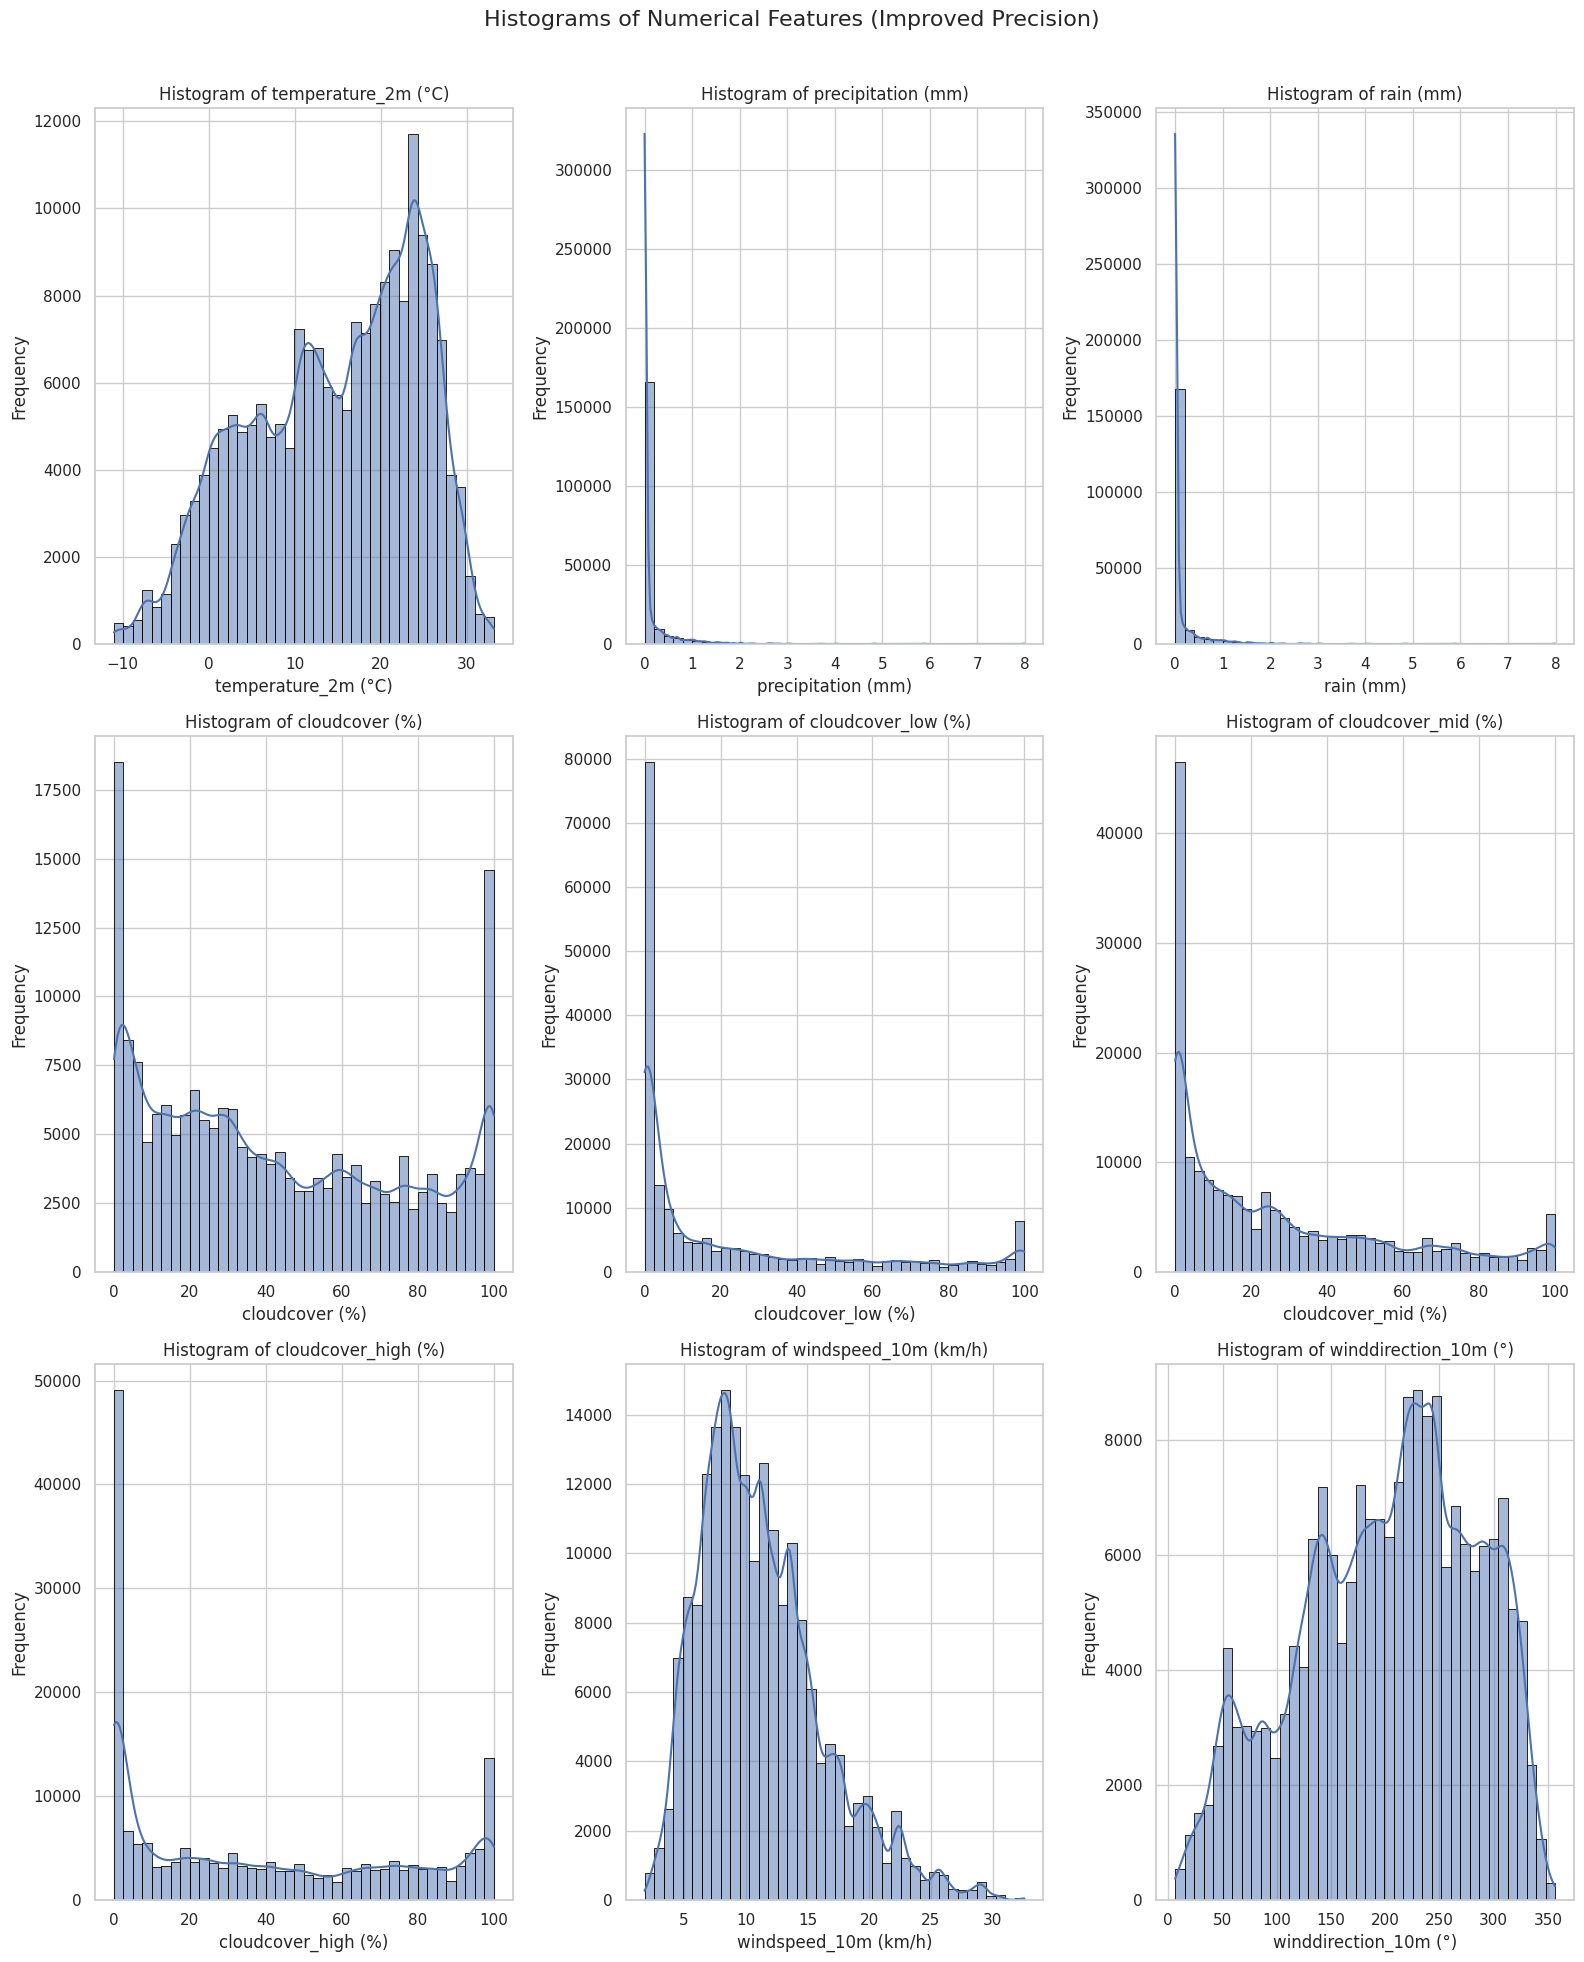

In [73]:
# Histograms for continuous numerical variables

conti_columns = [
    'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
    'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
    'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 20))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(conti_columns):
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Numerical Features (Improved Precision)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

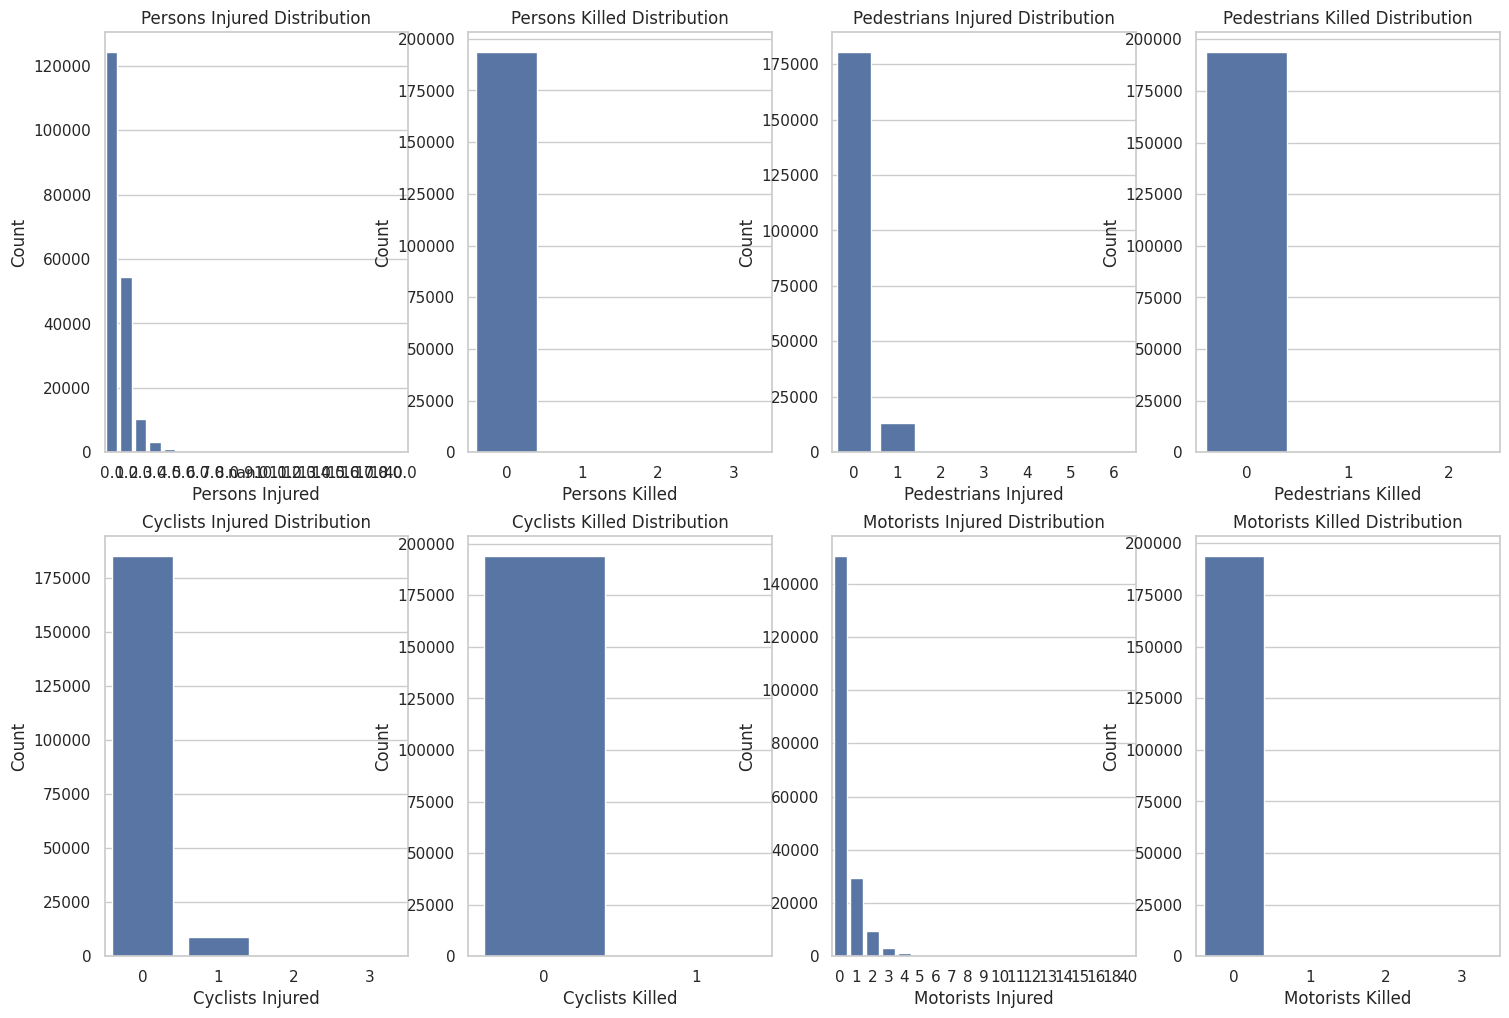

In [74]:
# Bar plots for imbalanced numeric variables

discret_columns = [
    'Persons Injured', 'Persons Killed', 'Pedestrians Injured',
       'Pedestrians Killed', 'Cyclists Injured', 'Cyclists Killed',
       'Motorists Injured', 'Motorists Killed'
]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(discret_columns):
    non_zero_values = sorted(df[col].unique())
    sns.countplot(x=col, data=df,order=non_zero_values, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")


plt.show()

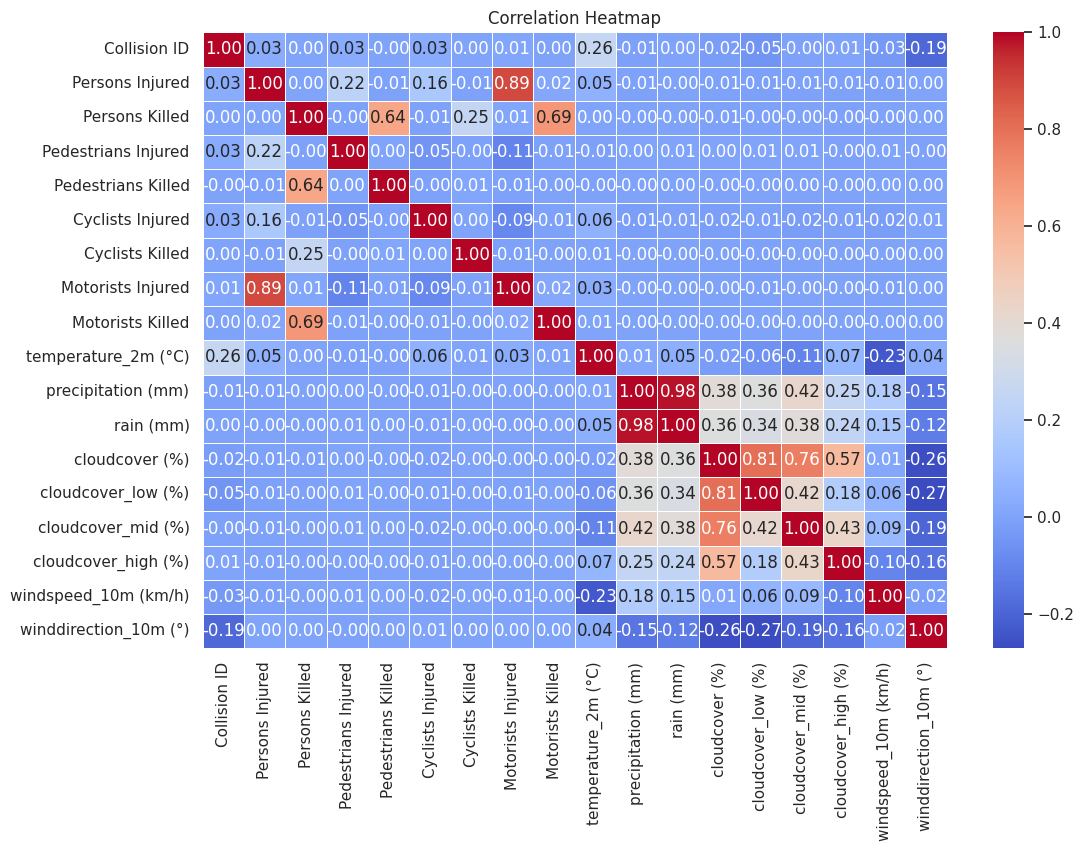

In [75]:
# Correlation Matrix
# Select numerical columns only

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()  # Only numeric columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the correlation matrix, we could observe that variables Motorists Killed are highly positive correlated with Persaons Injured. Motorists Killed and Person Killed are positive corrlated. As persons get injured/killed in a collision, the number of motorists injured/killed also increases, which may infer that motorists represent a large portion of road users, and motorists are vulnerable when it's large scale collision. Person Killed and Pedestrians Killed, are also highly correlated. However, correlations between collissions variables and weather variables seems to be low.

To further check the relationship between weather and collision, we draw the scatter plot of Temperature vs Persons Injured/Killed:

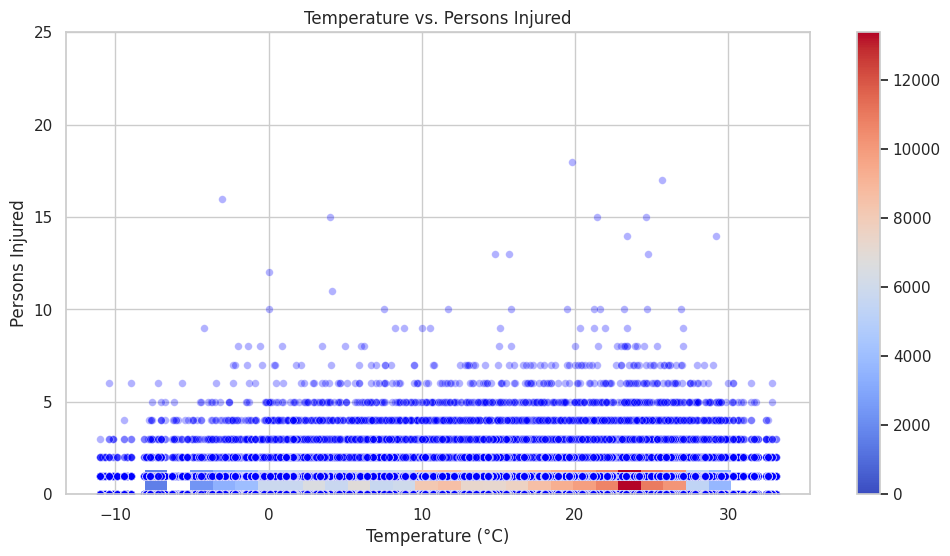

In [76]:
#Scatter plot: Temperature vs. Persons Injured

fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim(0,25)
sns.histplot(x=df['temperature_2m (°C)'], y=df['Persons Injured'], bins=30, pthresh=0.1, cmap="coolwarm", ax=ax, cbar=True)
sns.scatterplot(x=df['temperature_2m (°C)'], y=df['Persons Injured'], color="blue", alpha=0.3, s = 30)
plt.title("Temperature vs. Persons Injured")
plt.xlabel("Temperature (°C)")
plt.ylabel("Persons Injured")
plt.show()

From the scatter plot, We could observe among different temperature, number of persons injured/killed are approximately evenly distributed, and there are more dots at lower injury values (0-5) than higher ones. To check the distribution clearer, add a heatmap colorbar to show density of persons injured. We could observe the highest density of injuries appears in 10-28°C, with a peak at 26°C around.

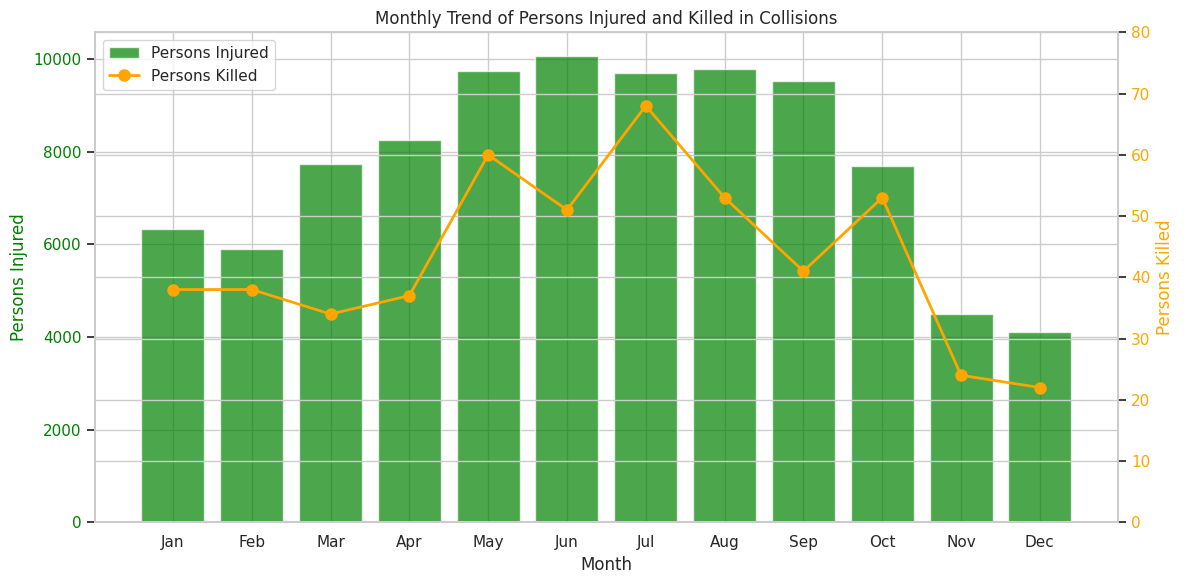

In [77]:
#Check monthly trend of person injured/killed

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.strftime('%b')

# Aggregate monthly data
monthly_counts = df.groupby('month')[['Persons Injured', 'Persons Killed']].sum()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_counts = monthly_counts.reindex(month_order)


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot "Persons Injured" as green bars
bars = ax1.bar(monthly_counts.index, monthly_counts['Persons Injured'], color='green', alpha=0.7, label="Persons Injured")
ax1.set_xlabel("Month")
ax1.set_ylabel("Persons Injured", color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create secondary y-axis for "Persons Killed"
ax2 = ax1.twinx()
line, = ax2.plot(monthly_counts.index, monthly_counts['Persons Killed'], color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, label="Persons Killed")
ax2.set_ylabel("Persons Killed", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 80)

# Add legend
lines = [bars, line]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title("Monthly Trend of Persons Injured and Killed in Collisions")
fig.tight_layout()

plt.show()

In this plot, green bars represent the total number of people injured in traffic collisions each month, and the orange line with markers represents the number of people killed in collisions per month.

We observed that the highest number of injuries occurs between May to September. While the persons killed are highest at May, July and Oct. Both numbers of persons injured and person killed descreases at Jan-Feb, and Nov-Dec.

This plot reveals a seasonal trend in both the number of injuries and fatalities, possibly due to travel patterns, seasonal weather conditions, and fluctuations in traffic regulations throughout the year.

## Data Preprocessing and Feature Engineering

In [83]:
from sklearn.impute import KNNImputer
import numpy as np
import scipy.stats as stats

In [78]:
# loading the dataset
df = merged_data_cleaned

### Handling Missing Values

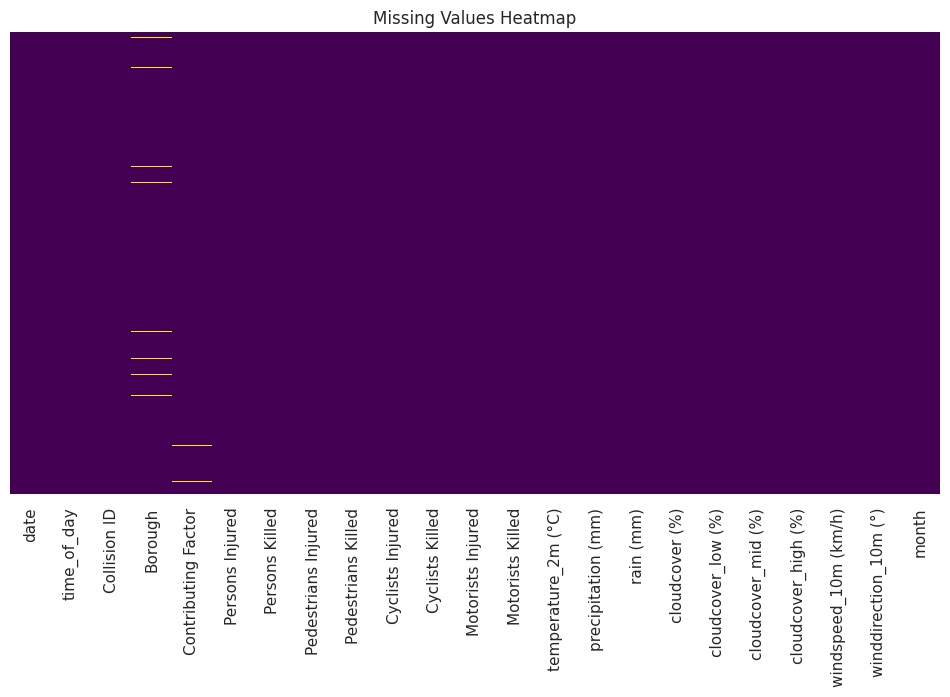

In [80]:
# Visualizing missingness pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [82]:
# Impute missing numerical values using KNN imputation
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Checking missing values after KNN imputation
missing_after_imputation = df[numerical_cols].isnull().sum()
missing_after_imputation

,0
Collision ID,0
Persons Injured,0
Persons Killed,0
Pedestrians Injured,0
Pedestrians Killed,0
Cyclists Injured,0
Cyclists Killed,0
Motorists Injured,0
Motorists Killed,0
temperature_2m (°C),0


### Handling Outliers

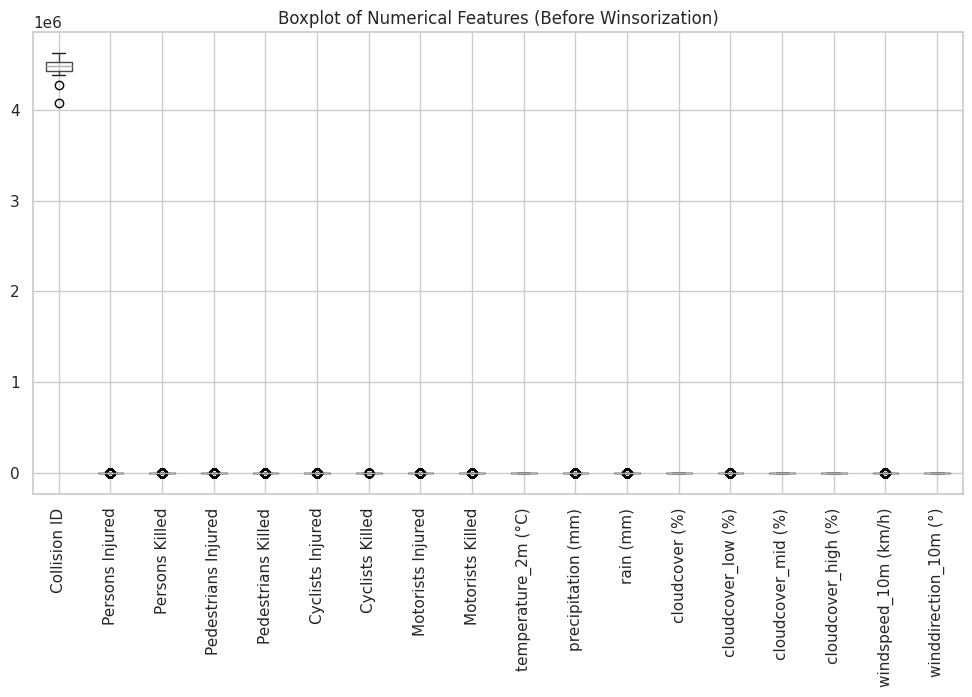

In [87]:
# Visualize outliers using boxplots before handling
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features (Before Winsorization)")
plt.show()

Since the boxplot for numerical attributes shows no extreme outliers in the numerical features, we can move on to the next step without winsorization or capping. For the weather variables, we make sure that the weather values don't have any outliers by using IOR to check their lower and upper bounds.

In [88]:
# Handling outliers using IQR for weather variables
weather_cols = ['temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
                'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
                'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)']
for col in weather_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

### Feature Engineering

#### Time-based features

In [93]:
# Understand dates
# where 0 = Monday, and 6 = Sunday
df['day_of_week'] = df['date'].dt.dayofweek
# 1 if Sat/Sun, else 0
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [91]:
# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['date'].dt.month.apply(get_season)

In [92]:
# Rush Hours (Peak Traffic Hours: 7-9 AM & 4-7 PM)
def is_rush_hour(time_of_day):
    return 1 if time_of_day in ['morning', 'midday'] else 0

df['rush_hour'] = df['time_of_day'].apply(is_rush_hour)

#### Severity features

Instead of treating injuries and fatalities separately, we create a severity score, based on the rationale that fatalities weigh more heavily than injuries in assessing the severity of accidents.

In [95]:
# Calculate the severity score
df['Severity_Score'] = (1 * df['Persons Injured']) + (3 * df['Persons Killed'])

In [96]:
df.head()

,date,time_of_day,Collision ID,Borough,Contributing Factor,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,...,cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),month,day_of_week,is_weekend,season,rush_hour,Severity_Score
0,2021-01-01,night,4491746.0,Bronx,Pavement Slippery,0.0,0.0,0.0,0.0,0.0,...,95.625,99.50,7.9625,145.375,Jan,4,0,Winter,0,0.0
1,2021-01-01,midday,4381244.0,Manhattan,Unsafe Speed,0.0,0.0,0.0,0.0,0.0,...,2.750,87.25,6.9375,47.375,Jan,4,0,Winter,1,0.0
2,2021-01-01,midday,4380799.0,Queens,Driver Inattention/Distraction,1.0,0.0,0.0,0.0,0.0,...,2.750,87.25,6.9375,47.375,Jan,4,0,Winter,1,1.0
3,2021-01-01,night,4381095.0,Brooklyn,Unspecified,0.0,0.0,0.0,0.0,0.0,...,95.625,99.50,7.9625,145.375,Jan,4,0,Winter,0,0.0
4,2021-01-01,morning,4380755.0,Queens,Unspecified,0.0,0.0,0.0,0.0,0.0,...,1.125,70.00,7.9375,339.375,Jan,4,0,Winter,1,0.0


In [97]:
# Average severity per borough

# Calculate the average severity per borough
borough_severity = df.groupby('Borough')['Severity_Score'].mean()
borough_severity_df = pd.DataFrame({'Borough': borough_severity.index, 'borough_severity_rank': borough_severity.values})

# Merge the borough severity rank back into the main DataFrame
df = pd.merge(df, borough_severity_df, on='Borough', how='left')

In [99]:
# Minimum and maximum severity scores
min_severity = df['Severity_Score'].min()
max_severity = df['Severity_Score'].max()

print(f"Minimum Severity Score: {min_severity}")
print(f"Maximum Severity Score: {max_severity}")


Minimum Severity Score: 0.0
Maximum Severity Score: 40.0


In [102]:
# Group by borough and condition (rainy/clear)
rainy_days = df[df['rain (mm)'] > 0]
clear_days = df[df['rain (mm)'] == 0]

avg_severity_rainy = rainy_days.groupby('Borough')['Severity_Score'].mean()
avg_severity_clear = clear_days.groupby('Borough')['Severity_Score'].mean()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({'Borough': avg_severity_rainy.index,
                             'Avg Severity (Rainy)': avg_severity_rainy.values,
                             'Avg Severity (Clear)': avg_severity_clear.values})
comparison_df

,Borough,Avg Severity (Rainy),Avg Severity (Clear)
0,Bronx,0.516110,0.492440
1,Brooklyn,0.521259,0.491872
2,Manhattan,0.461066,0.444856
3,Queens,0.512551,0.481836
4,Staten Island,0.464773,0.459393


Rain makes accidents worse across all NYC boroughs, which isn’t too surprising. Reasons could include slippery roads, poor visibility, and longer stopping distances. But Brooklyn and Queens see the biggest jump in severity, which could be due to faster roads, heavier traffic, or even drainage issues. Manhattan, on the other hand, barely changes, probably because traffic is already slow and drivers are more cautious. Staten Island is the least affected, likely because it has fewer cars on the road and more open space, so people naturally slow down when it rains.

#### Weather-based features

### For Tian Tian

1. Road conditions based on weather variables:
- Slippery Road Conditions:
Binary flag (1 if precipitation > 0 or high humidity, else 0).

- Poor Visibility Conditions:
Binary flag (1 if high cloud cover (> 70%), else 0).
Foggy Condition if high humidity and low windspeed.

2. Holiday Indicator: Accidents on public holidays might be different.

3. Weather-Adjusted Severity: Recompute the mean severity score per weather condition:
e.g., avg_severity_per_rain_level = mean(Severity Score) per precipitation_type

4. Seasonal Trends: Compare severity across seasons




In [104]:
# this is what df looks like right now
df.head()

,date,time_of_day,Collision ID,Borough,Contributing Factor,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,...,cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),month,day_of_week,is_weekend,season,rush_hour,Severity_Score,borough_severity_rank
0,2021-01-01,night,4491746.0,Bronx,Pavement Slippery,0.0,0.0,0.0,0.0,0.0,...,99.50,7.9625,145.375,Jan,4,0,Winter,0,0.0,0.499389
1,2021-01-01,midday,4381244.0,Manhattan,Unsafe Speed,0.0,0.0,0.0,0.0,0.0,...,87.25,6.9375,47.375,Jan,4,0,Winter,1,0.0,0.449687
2,2021-01-01,midday,4380799.0,Queens,Driver Inattention/Distraction,1.0,0.0,0.0,0.0,0.0,...,87.25,6.9375,47.375,Jan,4,0,Winter,1,1.0,0.490804
3,2021-01-01,night,4381095.0,Brooklyn,Unspecified,0.0,0.0,0.0,0.0,0.0,...,99.50,7.9625,145.375,Jan,4,0,Winter,0,0.0,0.500580
4,2021-01-01,morning,4380755.0,Queens,Unspecified,0.0,0.0,0.0,0.0,0.0,...,70.00,7.9375,339.375,Jan,4,0,Winter,1,0.0,0.490804
